### Сеть фитнес-центров «Культурист-датасаентист»
Задача: разработка стратегии взаимодействия с пользователями на основе аналитических данных, провести анализ и подготовить план действий по удержанию клиентов:


Основная проблема: отток клиентов (клиент попал в отток, если за последний месяц ни разу не посетил спортзал).


Описание данных: Сведения в csv-файлах. Данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:


##### Содержание
1. <a href='#Предобработка данных'>Предобработка данных</a>
2. <a href='#Исследовательский анализ данных (EDA)'>Исследовательский анализ данных (EDA)</a>
3. <a href='#Построение моделей'>Построение моделей</a>
4. <a href='#Кластеризация'>Кластеризация</a>
5. <a href='#Выводы'>Выводы</a>


#### 1. Предобработка данных
<a id='Предобработка данных'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
gym.columns = gym.columns.str.lower()

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
gym.duplicated().sum()

0

In [7]:
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int')

В данных нет пропусков и не выявленно дубликатов Всего в данных содержится 4000 строк о клиентах, как попавших в отток, так и продолжающих пользоваться спортзалом. 

Изменен формат данных для колонки Month_to_end_contract на int(). Значения этой колонки целочисленные. 

Подписи для колонок изменены - исользуются только строчные буквы - для удобства работы с ними.

#### 2. Исследовательский анализ данных
<a id='Исследовательский анализ данных (EDA)'></a>

In [33]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250,2.313500
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521,1.541042
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000,4.000000


Категориальными бинарными являются признаки: 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn'. Их удобнее расматривать отдельно от остальных признаков.

In [9]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [10]:
categorial_list = ['gender', 
                   'near_location', 
                   'partner', 
                   'promo_friends', 
                   'phone', 
                   'group_visits',
                   'contract_period',
                   'month_to_end_contract']

numeric_list = ['age', 
                'avg_additional_charges_total',  
                'lifetime', 
                'avg_class_frequency_total', 
                'avg_class_frequency_current_month']

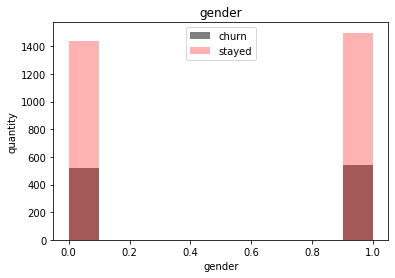

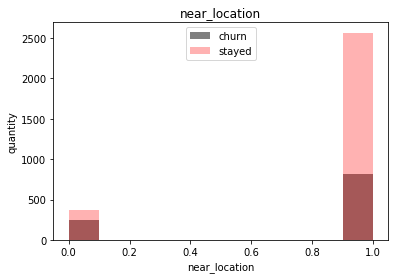

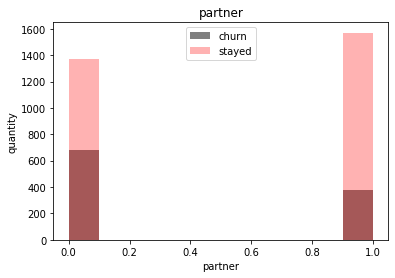

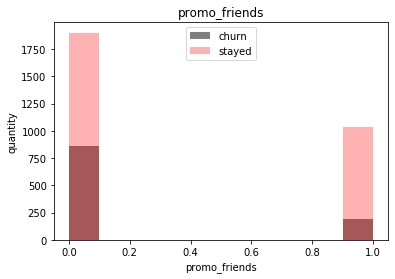

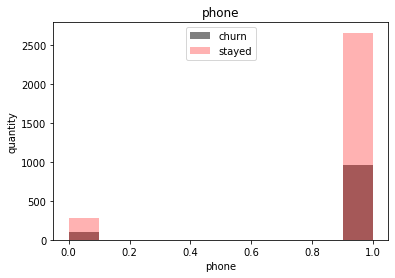

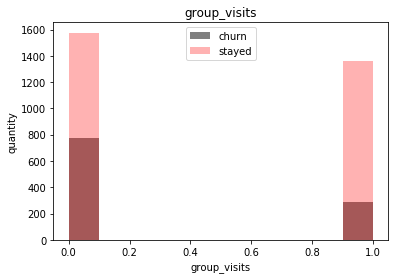

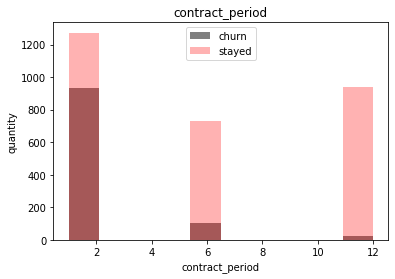

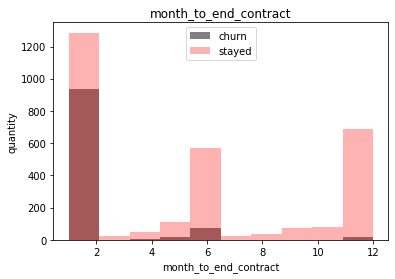

In [11]:
gym_churn = gym.query('churn == 1').drop(columns = ['churn'])
gym_here = gym.query('churn == 0').drop(columns = ['churn'])
for i in categorial_list:
    fig = plt.figure()
    ax = fig.add_subplot()    
    ax.hist(gym_churn[i], label = 'churn', alpha = 0.5, lw=3, color= 'black')
    ax.hist(gym_here[i], label = 'stayed', alpha = 0.3, lw=3, color= 'r')
    ax.set_title(i)

    ax.set_xlabel(i)
    ax.set_ylabel('quantity')

    plt.legend(loc = 9)
    plt.show()

Видимая разница в соотношении оставшихся посетителей и ушедших по признаку "partner". Среди ушидших большая часть посетителей не являются сотрудниками компании-партнёра клуба. Так же различается контрактый период. Среди оставшихся посетителей большая часть предпочитает заключать контракты на 6 и 12 месяцев, чем ушедшие.Что не удивительно - люди продолжают ходить в места, которым им нравятся, и не продлевают контракт, если их не устраивает спортзал. Однако это никак не указывает на причину оттока.

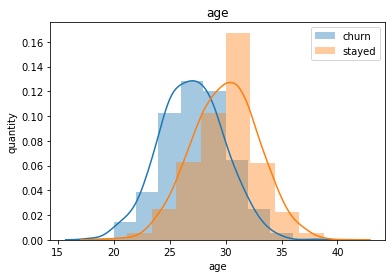

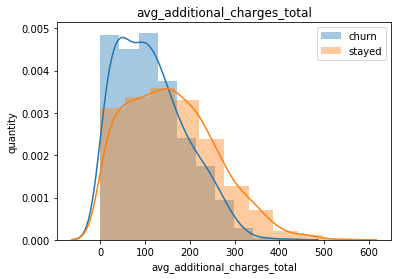

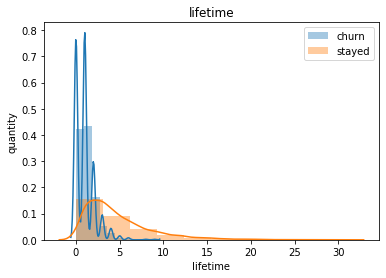

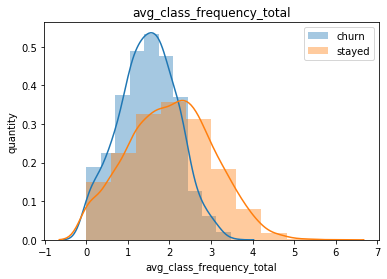

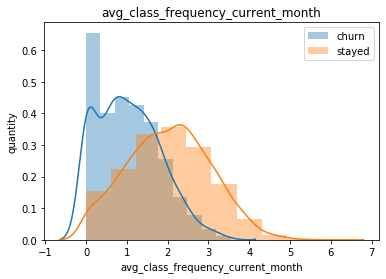

In [12]:
for i in numeric_list:
    
    sns.distplot(gym_churn[i], label = 'churn', bins = 10)    
                 
    sns.distplot(gym_here[i], label = 'stayed', bins = 10)
    plt.title(i)
    plt.ylabel('quantity')
    plt.legend()
    plt.show()

Оставшиеся посетители в среднем старше, совершают в среднем больше доп. покупок, чаще посещают зал (больше раз в неделю), чем ушедшие.

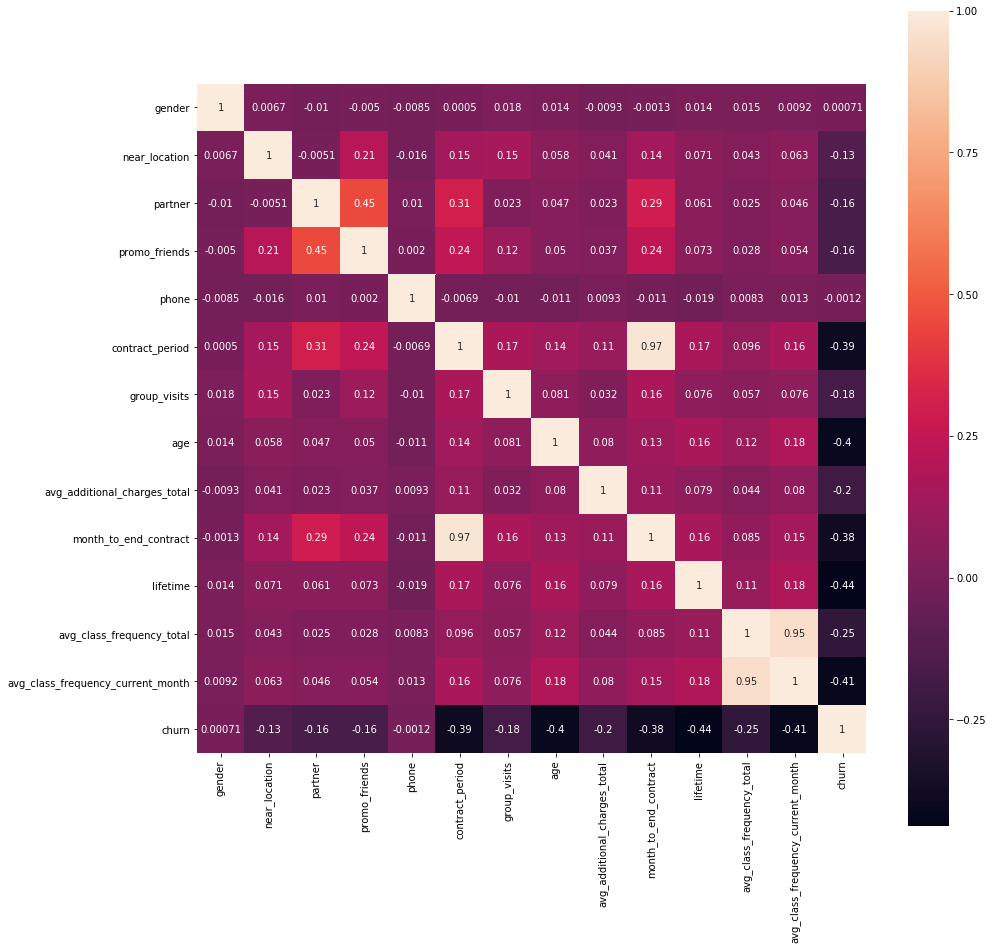

In [13]:
matrix_corr=gym.corr()
plt.figure(figsize = (15,15))
sns.heatmap(matrix_corr, annot = True, square = True)

Наибольшая корреляция признаков между параметрами partner и promo_friend, а так же между параметрами month_to_end_contract и contract_period,  что ожидаемо. Коллеги по работе предпочтут тренироваться вместе, а период контракта и месяц окончания контракта, так же как средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц — по сути являются одной и той же величиной, выраженной через разные системы. Так же видно среднюю корреляцию между оттоком и возрастом. 

#### 3. Посторение моделей 
<a id='Посторение моделей'></a>

In [14]:
# функцию, которая выводит метрики
def print_all_metrics(y_true, predictions, probabilities, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, predictions)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, predictions)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, predictions)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, predictions)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, probabilities)))

In [15]:
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
X = gym.drop(columns = ['churn'])
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [18]:
print_all_metrics(y_test, lr_predictions, lr_probabilities, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [19]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [20]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


Данные были разделены на тестовую и валидационную выборки (в соотношении 80%(train) на 20%(test)). На этих выборках было обучено две модели: 
- логистическая регрессия
- случайный лес

По итоговым метрикам (accuracy, precision, recall, f1, ROC_AUC) лучше себя показала модель логистической регрессии (выше precision, recall и f1, accuracy и ROC_AUC равны)

#### 4. Кластеризация пользователей
<a id='Кластеризация'></a>

In [21]:
X_sc = scaler.fit_transform(X)

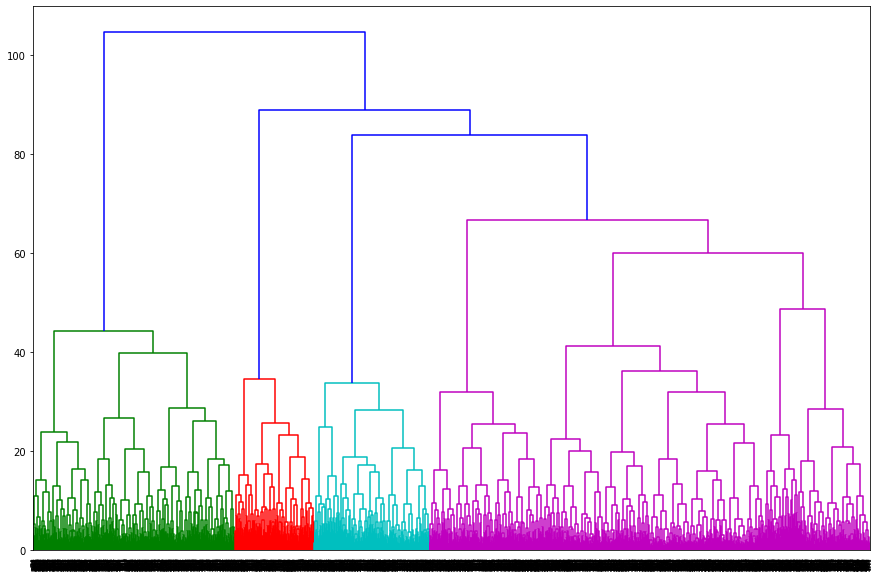

In [22]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Визуально на дендрограмме можно выделить 5 кластеров. 

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

In [24]:
gym['cluster_km'] = labels

In [25]:
gym.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.552969,0.979045,0.352736,0.233993,1.0,2.571595,0.470314,30.098952,162.548581,2.371362,5.006985,2.802940,2.798145,0.071013
1,0.496063,0.000000,0.460630,0.078740,1.0,2.375984,0.218504,28.486220,135.544499,2.222441,2.811024,1.666510,1.485248,0.440945
2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
3,0.501972,0.960552,0.783037,0.573964,1.0,10.887574,0.541420,29.980276,160.794855,9.948718,4.724852,1.996468,1.989661,0.027613
4,0.489051,1.000000,0.351987,0.237632,1.0,1.966748,0.340633,28.144363,130.234172,1.875912,2.317924,1.234082,0.995237,0.523114


Между кластерами нет явной разницы в распределении признака gender. Чуть больше gender = 1 в кластере 0 и 3. Чуть меньше половины - в кластере 1 и 2. 

Посетители из кластера 1 - самые старшие (средний возраст 30 лет). Совершают наибольшее количество покупок (avg_additional_charges_total = 161.15), наиболшьшим средним временем с момента первого обращения в фитнес-центр (4.9 месяцев), чаще всего посещают зал (среднее количество посещений в неделю 2.8). 

По признаку near_location: кластер 4 целиком состоит из посетителей у которых near_location = 1, а кластер 3 наоборот - near_location = 0. 

Так же в 4 кластере наиболее молодые посетители тренажерного зала, совершившие в среднем меньше всего доп.покупок (показатель avg_additional_charges_total), с наименьшим периодом абонемента, и соответсвтенно с наименьшим средним показателем month_to_end_contract. Посетители из первого кластера меньше всего в среднем посещают клуб (средний показатель lifetime = 2,37 - наименьший),  ходят реже посетителей из остальных кластеров. С наибольшим средним показателем по признаку churn (0.52).


Во 3м кластере посетители, живущие далеко от клуба, приходившие в клуб самостоятельно (наименьшее среднее по показателю promo_friends), редко посещающие групповые занятия. 

По признаку phone - в кластере 0 все пользователи, не оставлявшие номер телефона, при этом наименьшая средняя по показателю churn. При этом эти посетители в целом покупают абонемент в среднем на 4.7 месяца, совершают среднее количество доп.покупок (avg_additional_charges_total = 144), посещают спортзал 3.94 месяцев, средняя частота посещения спортзала в неделю - 1.8 раз.



По признаку partner - наибольшее количество посетителей со значением partner= 1 в кластере 2, так же как и по признакам promo_friends, group_visits, month_to_end_contract. Так же кластер 2 имеет наиболее долгий период абонемента. И вероятность выбытия (средняя по показателю churn) = 0.027 - уступает только 0 кластеру.

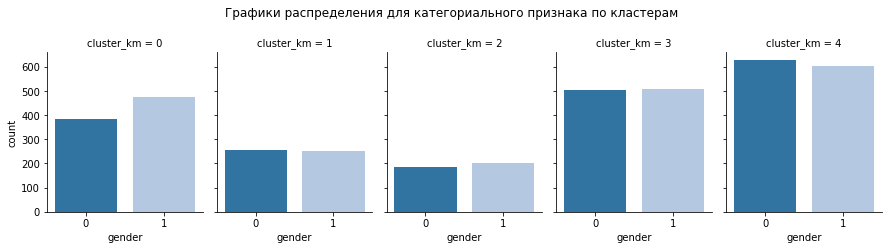

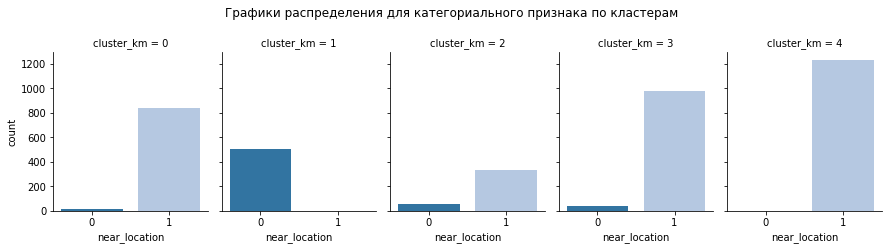

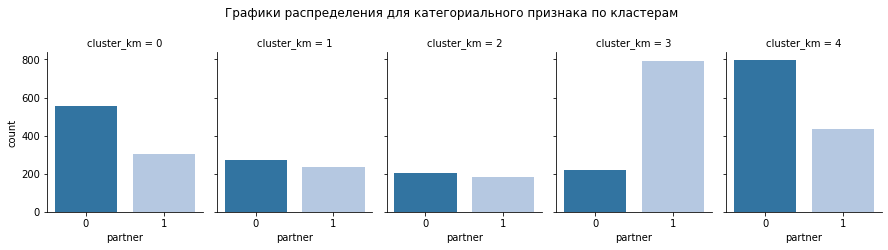

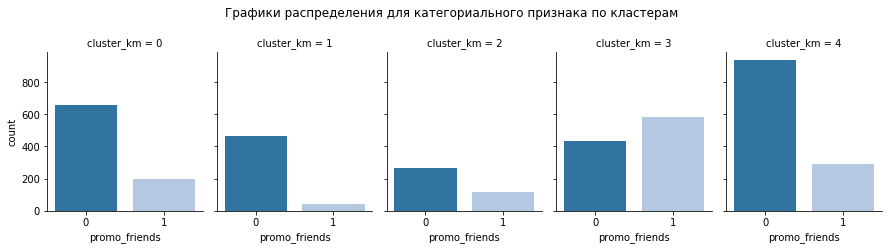

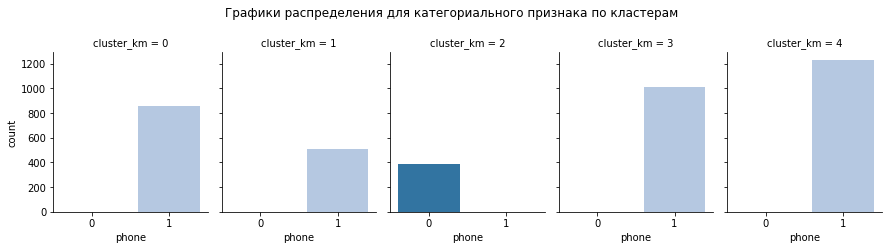

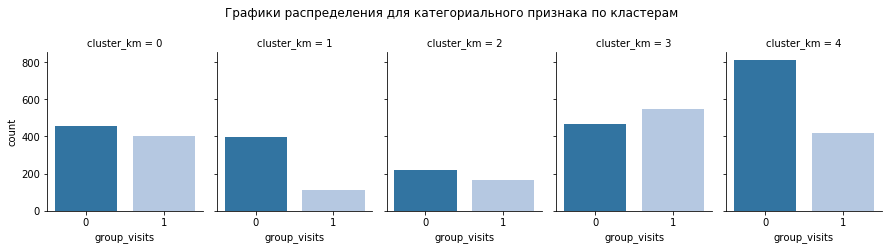

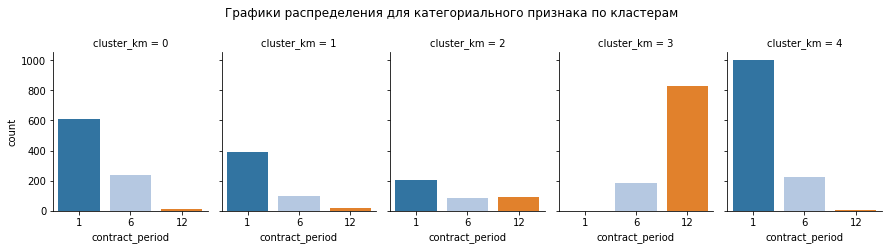

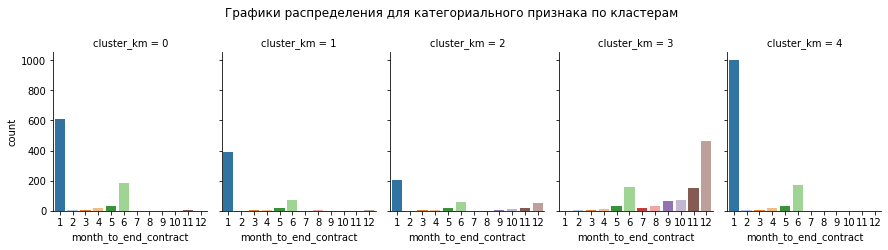

In [26]:
for i in categorial_list:

    g = sns.catplot(i, col="cluster_km", col_wrap=5,
                    data=gym,
                    kind="count", height=3.5, aspect=.7, 
                    palette='tab20')
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle('Графики распределения для категориального признака по кластерам')
    plt.show()

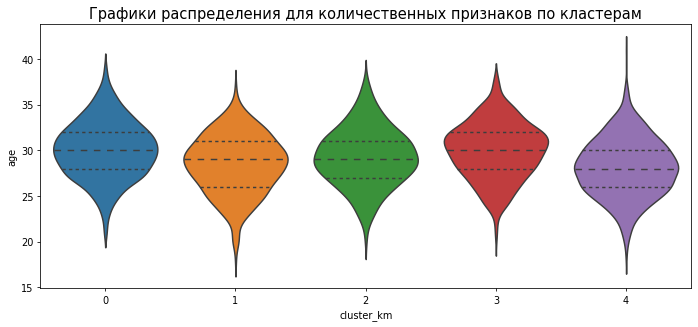

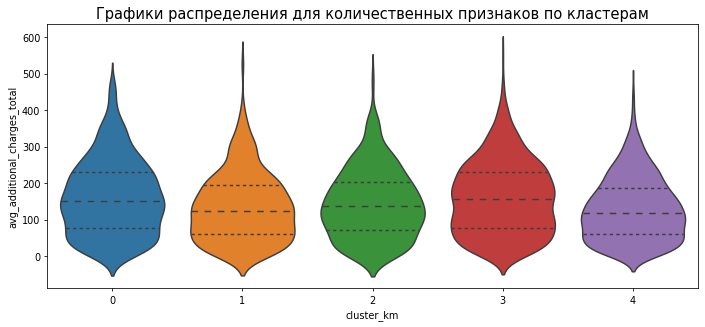

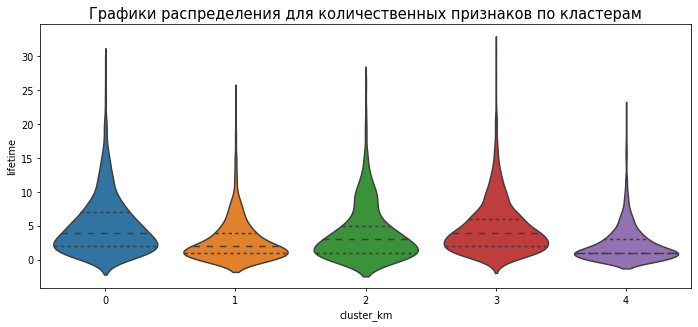

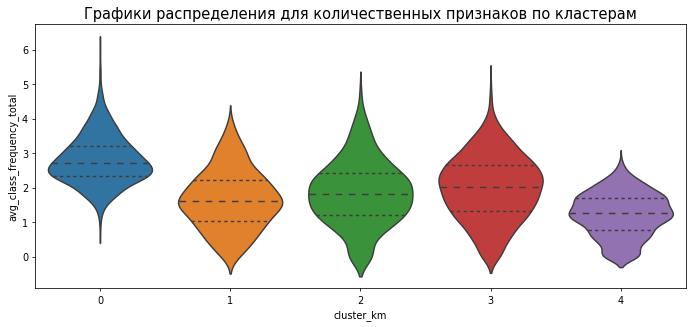

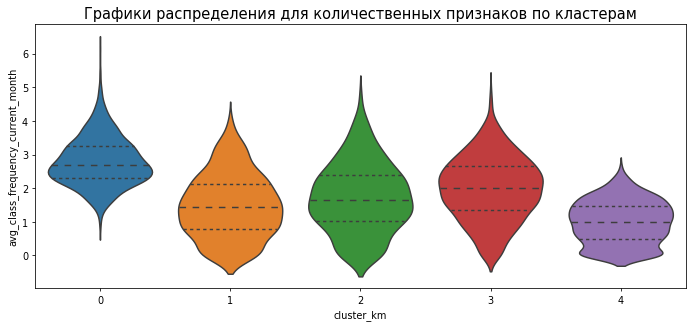

In [27]:
for i in numeric_list:
    plt.figure(figsize=(12,5), dpi= 70)
    sns.violinplot(x= 'cluster_km', y= i, data=gym, scale='width', inner='quartile')
    plt.title('Графики распределения для количественных признаков по кластерам', fontsize=15)
    plt.show()

In [28]:
for i in gym['cluster_km'].unique():
    print('% оттока для кластера {} равен: {:.2%}'.format(i, 
                                                          (gym.query('cluster_km == @i')['churn']
                                                           .sum()/len(gym.query('cluster_km == @i')))))

% оттока для кластера 2 равен: 26.68%
% оттока для кластера 3 равен: 2.76%
% оттока для кластера 4 равен: 52.31%
% оттока для кластера 0 равен: 7.10%
% оттока для кластера 1 равен: 44.09%


Наибольший % оттока посетителей у 4 кластера. 

Наименьший - у 2. 

#### 5. Выводы 
<a id='Выводы'></a>

В данных нет пропусков и не выявленно дубликатов Всего в данных содержится 4000 строк о клиентах, как попавших в отток, так и продолжающих пользоваться спортзалом. 

Изменен формат данных для колонки Month_to_end_contract на int(). Значения этой колонки целочисленные. 

Подписи для колонок изменены - исользуются только строчные буквы - для удобства работы с ними.


Видимая разница в соотношении оставшихся посетителей и ушедших по признаку "partner". Среди ушидших большая часть посетителей не являются сотрудниками компании-партнёра клуба. Так же различается контрактый период. Среди оставшихся посетителей большая часть предпочитает заключать контракты на 6 и 12 месяцев, чем ушедшие.Что не удивительно - люди продолжают ходить в места, которым им нравятся, и не продлевают контракт, если их не устраивает спортзал. Однако это никак не указывает на причину оттока.


Оставшиеся посетители в среднем старше, совершают в среднем больше доп. покупок, чаще посещают зал (больше раз в неделю), чем ушедшие.


Наибольшая корреляция признаков между параметрами partner и promo_friend, а так же между параметрами month_to_end_contract и contract_period, что ожидаемо. Коллеги по работе предпочтут тренироваться вместе, а период контракта и месяц окончания контракта, так же как средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц — по сути являются одной и той же величиной, выраженной через разные системы. Так же видно среднюю корреляцию между оттоком и возрастом.


По предоставленным данным было обучено две модели для предсказания оттока клиентов. По итоговым метрикам (accuracy, precision, recall, f1, ROC_AUC) лучше себя показала модель логистической регрессии (выше precision, recall и f1, accuracy и ROC_AUC равны).

В ходе анализа данных было выделено 5 групп клиентов:
1. Кластер "Старшие". Посетители из кластера  - самые старшие (средний возраст 30 лет). Совершают наибольшее количество покупок (avg_additional_charges_total = 160.95), наиболшьшим средним временем с момента первого обращения в фитнес-центр (4.9 месяцев), чаще всего посещают зал (среднее количество посещений в неделю 2.8). 

2. Кластер "Соседи".  Посетители из кластер  - это люди, живущие недалеко от зала (средняя по near_location = 1). Так же в этом кластере наиболее молодые посетители тренажерного зала, совершившие в среднем меньше всего доп.покупок (показатель avg_additional_charges_total), с наименьшим периодом абонемента, и соответсвтенно с наименьшим средним показателем month_to_end_contract. Посетители из первого кластера меньше всего в среднем посещают клуб (средний показатель lifetime = 2,37 - наименьший), ходят чаще посетителей из остальных кластеров. С наибольшим средним показателем по признаку churn (0.52).

3. Кластер "Далекие одиночки". В кластере посетители, живущие далеко от клуба (средняя по near_location = 0), приходившие в клуб самостоятельно (наименьшее среднее по показателю promo_friends), редко посещающие групповые занятия. 

4. Кластер "Без телефона".В кластере все пользователи, не оставлявшие номер телефона, при этом наименьшая средняя по показателю churn. При этом эти посетители в целом покупают абонемент в среднем на 4.7 месяца, совершают среднее количество доп.покупок (avg_additional_charges_total = 144), посещают спортзал 3.94 месяцев, средняя частота посещения спортзала в неделю - 1.8 раз.

5. Кластер "Партнеры долгожители". В кластере  - наибольшее количество посетителей со значением partner= 1, так же как и по признакам promo_friends, group_visits, month_to_end_contract. Так же кластер 4 имеет наиболее долгий период абонемента. И вероятность выбытия (средняя по показателю churn) = 0.027 - уступает только кластеру "Без телефона".

Чтобы уменьшить уровень оттока, нужно выяснить причину оттока пользователей из кластеров "Соседи" и "Далекие одиночки" (наибольший % оттока).
Для кластера "Соседи" возможно предложить следующие варианты:
- расширить асортимент доп. услуг
- создать бонусную программу для более молодых посетителей на посещение групповых занятий и более выгодные условия на покупку абонемента на 6 месяцев, чем на один. 


Для кластера "Далекие одиночки" сложно предложить что-то не проведя доп. исследований. Люди, живущие далеко от зала, вынуждены тратить время и деньги н дорогу до зала. Условия в нашем зале должны быть более выгодны, чем в любом другом зале. Возможно, предложить скидку, например, на доп.услуги, людям проживающим далеко от зала. Ведь проще посещать зал и массажиста в одном месте. 

Посетителям кластера "Соседи" можно грубо присвоить статус "любопытствующие". У них низкий показатель частоты посещения зала. Бросать такие люди могут потому, что изначально пришли "полюбопытствовать, а что тут такое есть". В итоге зал их не цепляет, они не видят эффекта от своих усилий (если эти посетители занимаются самостоятельно), либо не расчитывают свои силы и время. Возможно, имеет смысл узнавать цель посещения (это не самый удобный вопрос, не все будут на него отвечать) зала. И предлагать первое занятие с тренером бесплатно, чтобы человек мог распланировать оптимальную нагрузку, посоветовавшись со специалистом, выяснить, а зачем вообще нужен зал, если человк и так всем доволен, подобрать что-то из групповых занятий. Потому что кроме нагрузок, важен режим и питание. Не все это понимают.  Плюс возможно эти люди не слишком информированы о том, что происходит в зале.

Для кластеров "Старшие" и "Без телефона" можно предложить какую-то программу лояльности, потому что при введении скидок и заманчивых предложений новичкам, можно потерять лояльных клиентов. А имеено они составляют базу зала: не могу ручатся за доход, поскольку не располагаю такими данными, но "Старшие" совершают в среднем наибольшее количество покупок доп.услуг. Чем дольше эти люди будут посещать зал, тем больше дохода принесут допы.

Кластер "Партнены долгожители" посещают зал дольше всех поскольку имеют наиболее выгодные условия в данном зале. Плюс эти люди чаще приходят с друзьями и посещают групповые тренировки. Допов они покупают лишь чуть меньше, чем "Старшие". Кажется, их программа на данный момент оптимальна. Если эта группа приносит достаточный доход, может стоит расширить программу партнерства?  